## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import SilhouetteVisualizer

# Task 1 - The Data

## 1.1 Loading the dataset

In [2]:
penguins_df = pd.read_csv('../data/penguins.csv')
penguins_df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...
339,NaN,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


## 1.2 Explaining the dataset

* This is the penguins dataset which will be used for this clustering analysis.

* It contains 344 specimen data in rows and 4 numerical dimensions viz. culmen_length, culmen_depth, flipper_length, body_mass and 1 categorical dimension called sex.

* The first three dimensions have been measured in mm, while the body_mass dimension has been measured in grams. The sex dimensions is recorded either as MALE or FEMALE depending upon the sex of the bird it was obtained from.

* This dataset is perfect for the project pitched in Phase 1, since the relevant data for clustering is available.

* Moreover, as the dataset does not specify the pre-emptively specify the presence of any particular species of penguins, it is highly suitable for an exploratory analysis whereby clusters if formed can be analysed without bias.

* As the ultimate goal of this endeavour is to aid the GEOMAR institute in their penguin conservation efforts based on their various physical attributes.

# Task 2 - Initial Data Analysis

In [5]:
penguins_df.shape

(344, 5)

In [6]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [7]:
penguins_df.isna().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

* As mentioned previously the dataset has 344 rows and 5 columns.

* Since the analysis is to be conducted on the physical characteristics of penguins, the sex dimension can be droppped.

* The data has a few null values which can be dropped in order to preserve the reliability of the data and not skew it by incorporating the mean from other data points. 

# Task 3 - Preprocessing

In [8]:
penguins_df.drop('sex', axis=1, inplace=True)
penguins_df.dropna(inplace=True)
penguins_df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
338,47.2,13.7,214.0,4925.0
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


In [9]:
penguins_df.shape

(342, 4)

In [10]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 343
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
dtypes: float64(4)
memory usage: 13.4 KB


In [11]:
penguins_df.isna().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
dtype: int64

* The null and irrelevant data points have been dropped from the dataset.

* The dataset now contains 4 dimensions: culmen_length, culmen_depth, flipper_length measured in mm and body_mass measured in grams and 342 points of data from individual penguin specimen.

* It is now ready for further analysis.

# Task 4 - Exploratory Data Analysis: Statistical Properties

In [12]:
penguins_df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,214.014620,4201.754386
std,5.459584,1.974793,260.558057,801.954536
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.750000,4750.000000
max,59.600000,21.500000,5000.000000,6300.000000


<Axes: >

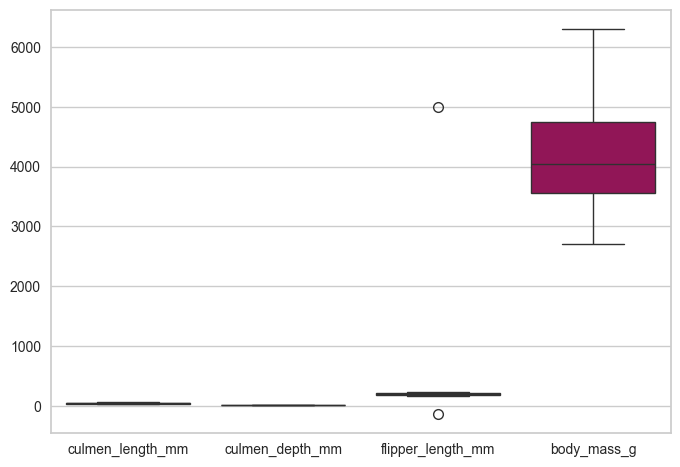

In [13]:
sns.boxplot(penguins_df)

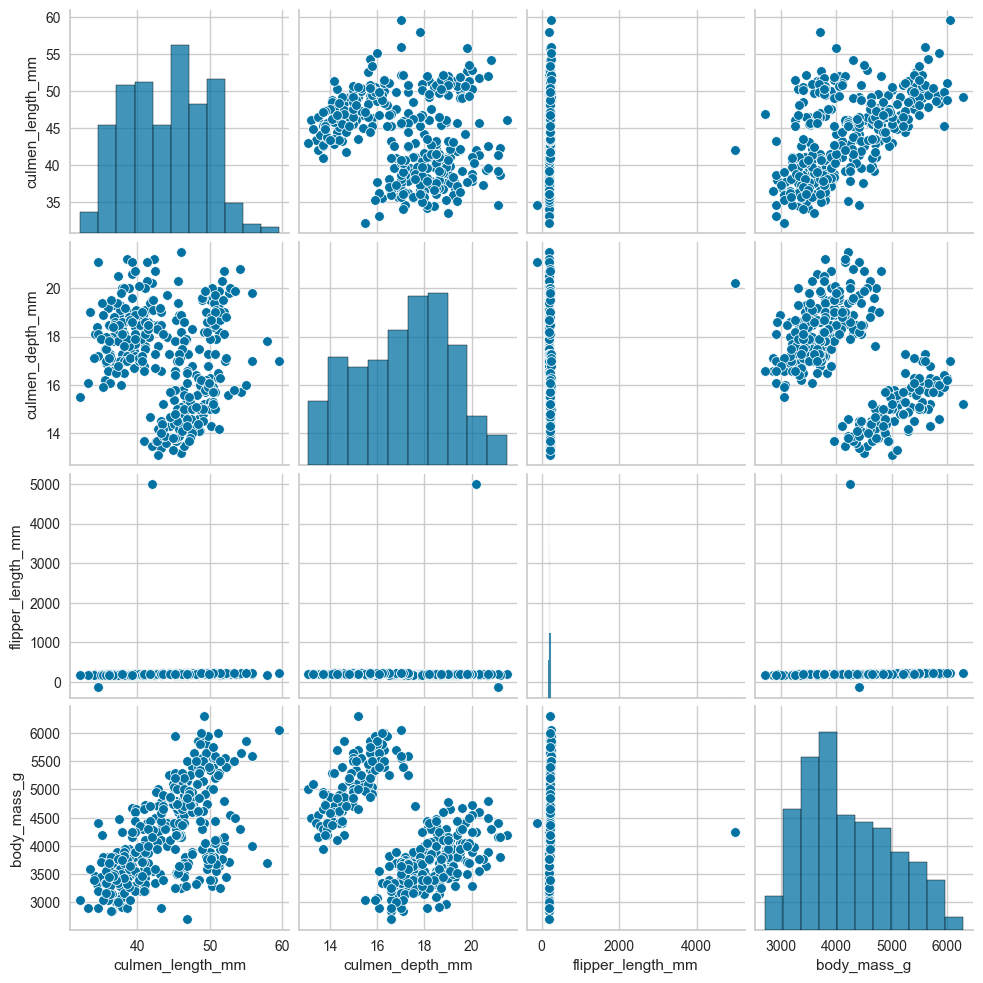

In [14]:
sns.pairplot(penguins_df)

# Task 5 - Exploratory Data Analysis: Clustering

## 5.1 k-Means

### 5.1.1 k = 2

In [25]:
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=20, init='k-means++', max_iter=300, tol=0.0001)
clusters = kmeans_2.fit_predict(penguins_df)

#### 5.1.1.1 Culmen Length vs Body Mass

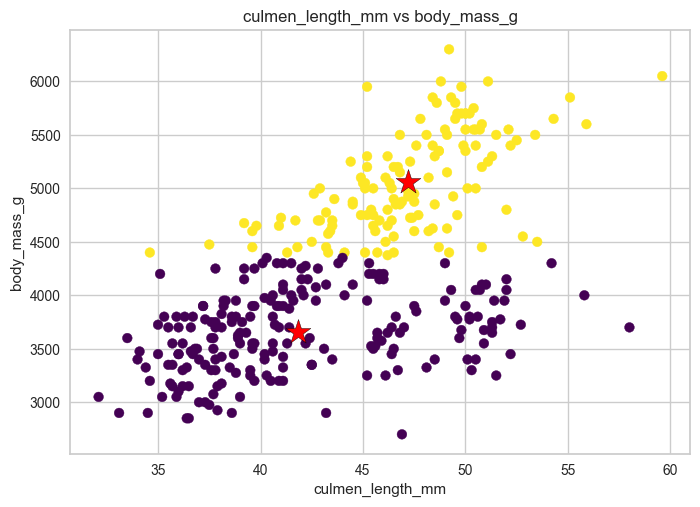

In [26]:
plt.scatter(penguins_df.culmen_length_mm, penguins_df.body_mass_g, c=clusters, cmap='viridis')

centroids = kmeans_2.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 3], marker='*', c='red', edgecolors='black', s=350)

plt.title('culmen_length_mm vs body_mass_g')
plt.xlabel('culmen_length_mm')
plt.ylabel('body_mass_g')
plt.show()

#### 5.1.1.2 Culmen Depth vs Body Mass

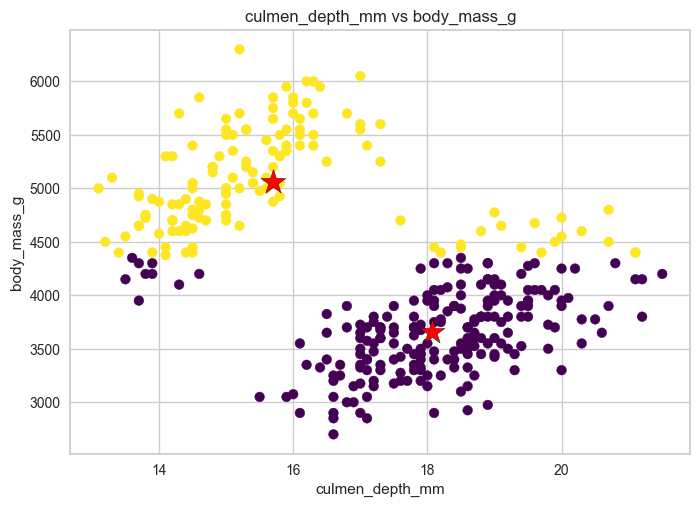

In [27]:
plt.scatter(penguins_df.culmen_depth_mm, penguins_df.body_mass_g, c=clusters, cmap='viridis')

centroids = kmeans_2.cluster_centers_
plt.scatter(centroids[:, 1], centroids[:, 3], marker='*', c='red', edgecolors='black', s=350)

plt.title('culmen_depth_mm vs body_mass_g')
plt.xlabel('culmen_depth_mm')
plt.ylabel('body_mass_g')
plt.show()

#### 5.1.1.3 Culmen Length vs Culmen Depth

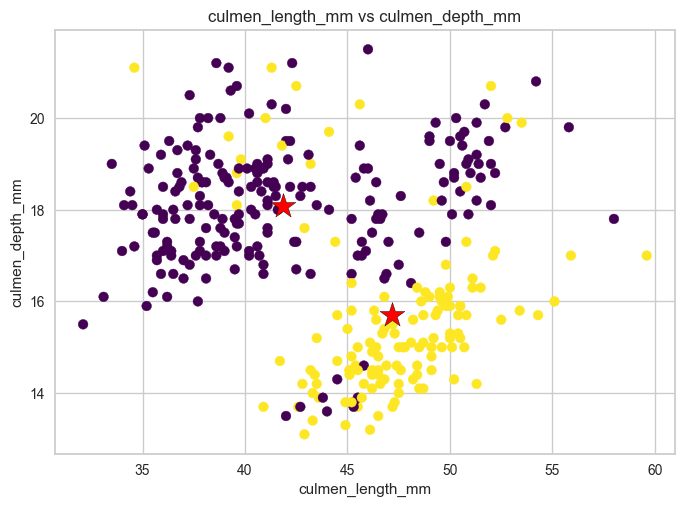

In [28]:
plt.scatter(penguins_df.culmen_length_mm, penguins_df.culmen_depth_mm, c=clusters, cmap='viridis')

centroids = kmeans_2.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='red', edgecolors='black', s=350)

plt.title('culmen_length_mm vs culmen_depth_mm')
plt.xlabel('culmen_length_mm')
plt.ylabel('culmen_depth_mm')
plt.show()

### 5.1.2 k = 3

In [30]:
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=20, init='k-means++', max_iter=300, tol=0.0001)
clusters = kmeans_3.fit_predict(penguins_df)

#### 5.1.2.1 Culmen Length vs Body Mass

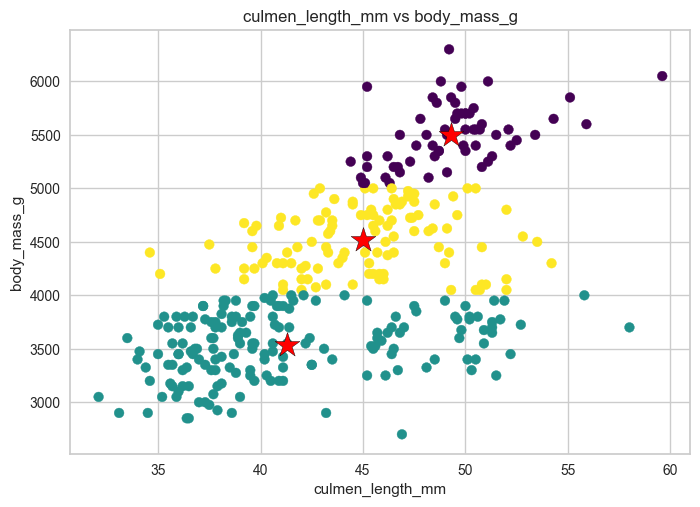

In [31]:
plt.scatter(penguins_df.culmen_length_mm, penguins_df.body_mass_g, c=clusters, cmap='viridis')

centroids = kmeans_3.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 3], marker='*', c='red', edgecolors='black', s=350)

plt.title('culmen_length_mm vs body_mass_g')
plt.xlabel('culmen_length_mm')
plt.ylabel('body_mass_g')
plt.show()

#### 5.1.2.2 Culmen Depth vs Body Mass

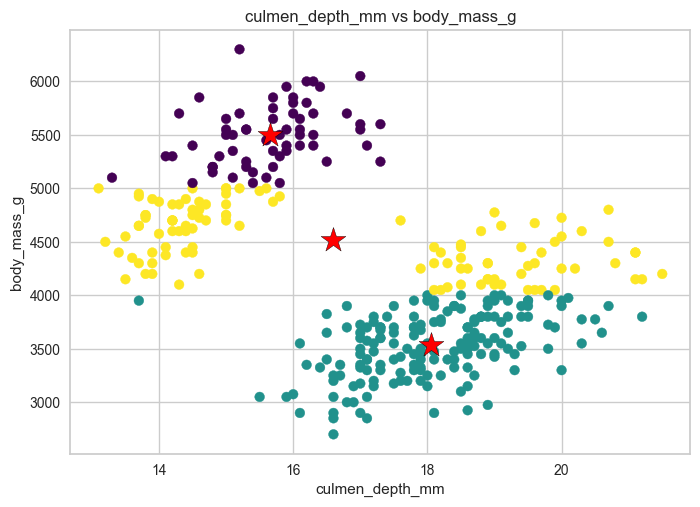

In [33]:
plt.scatter(penguins_df.culmen_depth_mm, penguins_df.body_mass_g, c=clusters, cmap='viridis')

centroids = kmeans_3.cluster_centers_
plt.scatter(centroids[:, 1], centroids[:, 3], marker='*', c='red', edgecolors='black', s=350)

plt.title('culmen_depth_mm vs body_mass_g')
plt.xlabel('culmen_depth_mm')
plt.ylabel('body_mass_g')
plt.show()

#### 5.1.2.3 Culmen Length vs Culmen Depth

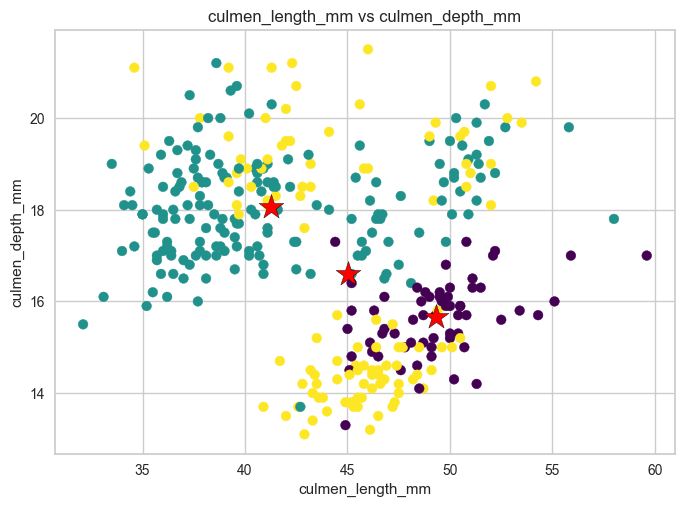

In [34]:
plt.scatter(penguins_df.culmen_length_mm, penguins_df.culmen_depth_mm, c=clusters, cmap='viridis')

centroids = kmeans_3.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='red', edgecolors='black', s=350)

plt.title('culmen_length_mm vs culmen_depth_mm')
plt.xlabel('culmen_length_mm')
plt.ylabel('culmen_depth_mm')
plt.show()

## 5.2 DBSCAN/OPTICS

## 5.3 HAC